# Determination of a prospective tariff for a telecom company

**Description of the project**
You are an analyst at Megaline, a federal mobile operator. Clients are offered two tariff plans: "Smart" and "Ultra". To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money.
You have to make a preliminary analysis of tariffs on a small sample of customers. At your disposal are the data of 500 Megaline users: who they are, where they are from, what tariff they use, how many calls and messages each sent in 2018. It is necessary to analyze the behavior of customers and draw a conclusion - which tariff is better.

**Description of tariffs**
- Tariff "Smart"
    - Monthly fee: 550 rubles
    - Included 500 minutes of calls, 50 messages and 15 GB of internet traffic
    - The cost of services above the tariff package:
minute of conversation: 3 rubles
message: 3 rubles
    - 1 GB of Internet traffic: 200 rubles
    
- Tariff "Ultra"
    - Monthly fee: 1950 rubles
    - Included 3000 minutes of calls, 1000 messages and 30 GB of internet traffic
    - The cost of services above the tariff package:
        minute of conversation: 1 ruble
        message: 1 ruble
    - 1 GB of Internet traffic: 150 rubles
    
    
*Note
Megaline always rounds seconds to minutes, and megabytes to gigabytes. Each call is rounded up separately: even if it lasted only 1 second, it will be counted as 1 minute.
For web traffic, individual sessions are not counted. Instead, the monthly total is rounded up. If a subscriber uses 1025 megabytes this month, they will be charged for 2 gigabytes. Please accept that unused calls, SMS, Internet for the previous month are not transferred to the next month.*

### Instructions for project execution
**Step 1. Open the data file and review the general information**
File path:
- /datasets/calls.csv. 
- /datasets/internet.csv.
- /datasets/messages.csv. 
- /datasets/tariffs.csv. 
- /datasets/users.csv. 

**Step 2: Prepare the data**
- Bring the data to the required types;
- Find and correct errors in the data, if any.
- Explain what bugs you found and how you fixed them. In the data you will find calls with zero duration. This is not a mistake: missed calls are marked with zeros, so they do not need to be deleted.
- Calculate for each user:
    - the number of calls made and spent minutes of conversation by month;
    - the number of sent messages by month;
    - the amount of Internet traffic used by months;
    - monthly revenue from each user (subtract the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan).

**Step 3. Analyze the data**
Describe the behavior of the operator's customers based on the sample. How many minutes of conversation, how many messages and how much Internet traffic do users of each tariff need per month? Calculate the mean, variance and standard deviation. Plot histograms. Describe the distributions.

**Step 4. Test the hypotheses**
- the average revenue of users of the "Ultra" and "Smart" tariffs differ;
- the average revenue of users from Moscow differs from the revenue of users from other regions.
Set the threshold value alpha yourself.
Explain:
How did you formulate the null and alternative hypotheses?
- what criterion was used to test the hypotheses and why.

**Step 5. Write a summary**


**Data Description**:

**Users table (user information):**
- user_id - unique user ID
- first_name - username
- last_name - last name of the user
- age — user's age (years)
- reg_date — tariff connection date (day, month, year)
- churn_date — date when the tariff was discontinued (if the value is omitted, then the tariff was still valid at the time of data upload)
- city — user's city of residence
- tariff — tariff plan name

**Table calls (information about calls):**
- id — unique call number
- call_date — call date
- duration — call duration in minutes
- user_id — identifier of the user who made the call

**Messages table (message information):**
- id — unique message number
- message_date — message date
- user_id — identifier of the user who sent the message

**Internet table (information about Internet sessions):**
- id — unique session number
- mb_used - the amount of Internet traffic spent per session (in megabytes)
- session_date — internet session date
- user_id - user ID

**Tariffs table (tariff information):**
- tariff_name — tariff name
- rub_monthly_fee — monthly subscription fee in rubles
- minutes_included - the number of minutes of conversation per month included in the subscription fee
- messages_included - number of messages per month included in the subscription fee
- mb_per_month_included - the amount of Internet traffic included in the subscription fee (in megabytes)
- rub_per_minute - the cost of a minute of conversation in excess of the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
- rub_per_message - the cost of sending a message in excess of the tariff package
- rub_per_gb - the cost of an additional gigabyte of Internet traffic in excess of the tariff package (1 gigabyte = 1024 megabytes)



## Study plan:

1 - Initial visual checking of data
- Analysis of raw data
- Data type definition
- Identification of missing values
- Identification of duplicates


2 - Data preprocessing:
 - Renaming and processing data columns
 - Converting data to correct types
 - Elimination of duplicates in the data, if any
 - Merging tables
 - Identification and elimination of outliers in the data, if any
 - Eliminate missing values in the data if necessary

        
3 - Working with data.
Calculate for each user:
- the number of calls made and spent minutes of conversation by month;
- the number of sent messages by month;
- the amount of Internet traffic used by months;
- monthly revenue from each user (subtract the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan).


4 - Data analysis:
- Analyze the data Describe the behavior of the operator's customers based on the sample. How many minutes of conversation, how many messages and how much Internet traffic do users of each tariff need per month? Calculate the mean, variance and standard deviation. Plot histograms. Describe the distributions.

5 - Hypothesis testing:
- the average revenue of users of the "Ultra" and "Smart" tariffs differ;
- the average revenue of users from Moscow differs from the revenue of users from other regions. Set the threshold value alpha yourself. Explain: How did you formulate the null and alternative hypotheses?
- what criterion was used to test the hypotheses and why.

6 - General conclusion

### Project implementation

In [1]:
# Import libraries
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read data from files. Because the project is running locally, then we use the try / except construct:
try:
    users = pd.read_csv('/datasets/users.csv', sep=',')
    tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
    messages = pd.read_csv('/datasets/messages.csv', sep=',')
    internet = pd.read_csv('/datasets/internet.csv', sep=',')
    calls = pd.read_csv('/datasets/calls.csv', sep=',')
    
except:
    users = pd.read_csv('C:/Users/Админ/Desktop/Jupyter/Yandex/users.csv.', sep=',')
    tariffs = pd.read_csv('C:/Users/Админ/Desktop/Jupyter/Yandex/tariffs.csv.', sep=',')
    messages = pd.read_csv('C:/Users/Админ/Desktop/Jupyter/Yandex/messages.csv.', sep=',')
    internet = pd.read_csv('C:/Users/Админ/Desktop/Jupyter/Yandex/internet.csv.', sep=',')
    calls = pd.read_csv('C:/Users/Админ/Desktop/Jupyter/Yandex/calls.csv.', sep=',')

### 1 - Primary visual checking of data

In [3]:
# function for primary data analysis
def data_info(data):
    print('First rows of dataset', sep='\n')
    display(data.head(5))
    print(sep='\n')
    print('General dataset information', sep='\n')
    data.info()
    print(sep='\n')
    print('Presence of gaps in the dataset', data.isna().sum(), '', sep='\n')

**Checking dataset data users:**

In [4]:
# Checking user data
data_info(users)

First rows of dataset


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



General dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Presence of gaps in the dataset
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64



In [5]:
users['user_id'].duplicated().sum()

0

In [6]:
users['age'].sort_values()

77     18
204    18
270    18
268    18
473    18
       ..
254    75
436    75
478    75
177    75
219    75
Name: age, Length: 500, dtype: int64

In [7]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

A brief summary of the users dataset:
- There are 500 unique users in the dataset
- There are 462 missing values in the churn_date data - the tariff is still valid at the time of unloading.
- There are no duplicates in the user_id data
- Age of users from 18 to 75 years old - normal values
- No implicit duplicates found in city data
- Data to replace types: churn_date, reg_date

**Check of dataset messages**

In [8]:
# Checking the messages data:
data_info(messages)

First rows of dataset


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



General dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Presence of gaps in the dataset
id              0
message_date    0
user_id         0
dtype: int64



In [9]:
messages['user_id'].unique().shape

(426,)

In [10]:
messages['id'].duplicated().sum()

0

A brief summary of the messages dataset:
- There are 426 unique users in the dataset (meaning 74 users are not sending messages)
- There are no missing values in the data
- There are no duplicates in the id data
- Data to replace types: message_date
- Replace names in columns: id

**Internet dataset data check**

In [11]:
# Checking internet data:
data_info(internet)

First rows of dataset


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



General dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Presence of gaps in the dataset
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64



In [12]:
internet['user_id'].unique().shape

(497,)

In [13]:
internet['id'].duplicated().sum()

0

In [14]:
internet['mb_used'].sort_values()

116616       0.00
53410        0.00
104303       0.00
19438        0.00
19437        0.00
           ...   
140299    1623.92
103480    1651.25
7063      1651.55
119156    1702.75
137493    1724.83
Name: mb_used, Length: 149396, dtype: float64

In [15]:
internet[internet['mb_used'] == 0.00].count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

<AxesSubplot:>

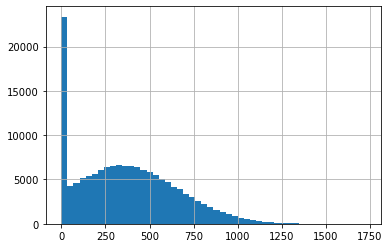

In [16]:
internet['mb_used'].hist(bins=50)

In [17]:
internet[internet['mb_used'] == 0.00]['user_id'].unique().shape


(494,)

In [18]:
internet[internet['mb_used'] == 0.00]

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


A brief summary of the internet dataset:
- There are 497 unique users in the dataset (this means that 3 users did not have access to the Internet)
- Out of 149396 rows, 19598 have zero mb_used values, that's 13.12%. Perhaps some users do not consume mobile Internet, as they use home or work WiFi
- There are no missing values in the data
- There are no duplicates in the id data
- Data to replace types: session_date
- Replace names in columns: id
- Remove column Unnamed 0

**Check dataset calls**

In [19]:
# View data calls:
data_info(calls)

First rows of dataset


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



General dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Presence of gaps in the dataset
id           0
call_date    0
duration     0
user_id      0
dtype: int64



In [20]:
calls['user_id'].unique().shape

(492,)

In [21]:
calls['id'].duplicated().sum()

0

In [22]:
calls['duration'].sort_values()

0          0.00
57375      0.00
57380      0.00
57381      0.00
157627     0.00
          ...  
60889     35.95
39777     36.12
5865      36.47
178737    37.35
95088     38.00
Name: duration, Length: 202607, dtype: float64

In [23]:
calls[calls['duration'] == 0.00].count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

<AxesSubplot:>

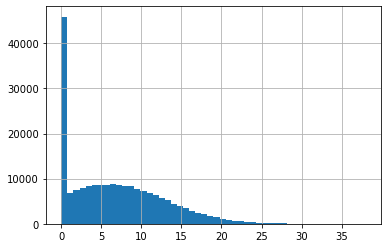

In [24]:
calls['duration'].hist(bins=50)

A brief summary of the calls dataset:
- There are 492 unique users in the dataset (this means that 8 users did not make calls)
- Out of 202607 lines, 39613 have zero duration values, which is 19.55%, however, according to the conditions of the task, zero values are a missed call
- There are no missing values in the data
- There are no duplicates in the id data
- Data to replace types: call_date
- Replace names in columns: id

**Tariff Dataset check**

In [25]:
# check data tariffs:
data_info(tariffs)

First rows of dataset


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



General dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Presence of gaps in the dataset
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64



A brief summary of the tariffs dataset:
- data on the climates are indicated in mb. You need to convert them to gb

#### Conclusion on the initial visual evaluation of the data

A brief summary of the users dataset:
- There are 500 unique users in the dataset
- There are 462 missing values in the churn_date data - the tariff is still valid at the time of unloading.
- There are no duplicates in the user_id data
- Age of users from 18 to 75 years old - normal values
- No implicit duplicates found in city data
- Data to replace types: churn_date, reg_date

A brief summary of the messages dataset:
- There are 426 unique users in the dataset (meaning 74 users are not sending messages)
- There are no missing values in the data
- There are no duplicates in the id data
- Data to replace types: message_date
- Replace names in columns: id

A brief summary of the internet dataset:
- There are 497 unique users in the dataset (this means that 3 users did not have access to the Internet)
- Out of 149396 rows, 19598 have zero mb_used values, that's 13.12%
- There are no missing values in the data
- There are no duplicates in the id data
- Data to replace types: session_date
- Replace names in columns: id
- Remove column Unnamed 0

A brief summary of the calls dataset:
- There are 492 unique users in the dataset (this means that 8 users did not make calls)
- Out of 202607 lines, 39613 have zero duration values, which is 19.55%, however, according to the conditions of the task, zero values are a missed call
- Maximum phone call duration 38 minutes - values are normal
- There are no missing values in the data
- There are no duplicates in the id data
- Data to replace types: call_date
- Replace names in columns: id

A brief summary of the tariffs dataset:
- data on the climates are indicated in mb. You need to convert them to gb


General conclusion:
 - all values ​​in the data users['age'], calls['duration'], internet['mb_used'] values ​​are within normal limits, there is no need to speak about the presence of outliers.
 - there are no missing values in the data, except for the data users['churn_date'] - there are 462 gaps - the tariff is still valid at the time of unloading.
 - all data, with the exception of columns containing information about the date, are correct. Data type substitution is required only for data with a date
 - data on the climates are indicated in mb. You need to convert them to gb
 - internet dataset contains extra column Unnamed: 0, needs to be deleted
 - datasets internet, messages, calls contain columns with the same 'id' name - this can create confusion if multiple tables need to be merged. It is necessary to replace these names with those that will reflect belonging to certain data.

### 2 - Data preprocessing:

- Delete extra column: delete the Unnamed column from the internet dataset: 0
- Renaming columns in datasets: messages, internet, calls (this will help to correctly recognize data after merging tables)
- Casting data to correct types: (change data from object to datetime)
- Change limits from mb to gb in the tariffs data set
- In the calls data set, round the duration up to integer values in accordance with the terms of the tariff.

In [26]:
# remove extra column 'Unnamed: 0'
internet = internet.drop('Unnamed: 0', axis=1)

In [27]:
# Change the name of the columns cityCenters_nearest, parks_around3000, ponds_around3000
messages.rename(columns={'id':'id_messages'}, inplace=True)
internet.rename(columns={'id':'id_internet'}, inplace=True)
calls.rename(columns={'id':'id_calls'}, inplace=True)

In [29]:
# Let's convert the data to the correct types (change the data from object to datetime):
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='ignore')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d', errors='ignore')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d', errors='ignore')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d', errors='ignore')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d', errors='ignore')

In [30]:
# Change limits from mb to gb in the tariffs dataset:
tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace=True)
tariffs['gb_per_month_included'] = (tariffs['gb_per_month_included'] / 1024)

In [31]:
# In the calls data set, round the duration up to integer values in accordance with the terms of the tariff:
calls['duration'] = np.ceil(calls['duration']).astype('int')

### 3 - Working with data. Calculate for each user:

- the number of calls made and spent minutes of conversation by month;
- the number of sent messages by month;
- the amount of Internet traffic used by months;
- monthly revenue from each user (subtract the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan).

In [32]:
# select months from calls, messages, internet:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [33]:
# Using the pivot table, display the number of calls made and the duration of conversations for each user
# by month

calls_info = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_info.columns = ['calls_count','calls_duration']

calls_info

calls_count  calls_duration
user_id month                             
1000    5               22             159
        6               43             172
        7               47             340
        8               52             408
        9               58             466
...                    ...             ...
1498    10              41             247
1499    9                9              70
        10              68             449
        11              74             612
        12              69             492

[3174 rows x 2 columns]

In [34]:
# Calculate the number of sent messages by month:
messages_info = messages.pivot_table(index=['user_id', 'month'], values='id_messages', aggfunc= 'count')
messages_info.columns = ['message_count']
messages_info

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

In [35]:
# Calculate the volume of Internet traffic used by months:
# Since, according to the terms of the tariff, the spent Gb are rounded up to integer values for the end of the month, then
# round the values up to integer Gb:
internet_info = internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
internet_info['mb_used'] = np.ceil(internet_info['mb_used']/1024).astype('int')
internet_info.columns = ['gb_used']
internet_info

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15
...                ...
1498    10          21
1499    9            2
        10          18
        11          18
        12          13

[3203 rows x 1 columns]

In order to calculate the monthly revenue from each user, you will need:
- subtract the free limit from the total number of calls, messages and internet traffic;
- multiply the remainder by the value from the tariff plan;
- add a subscription fee corresponding to the tariff plan.

In [36]:
# Let's create a data set, which will be convenient to calculate the required values:
mega = pd.concat(objs=[calls_info, messages_info, internet_info],join='outer',axis=1).sort_values(by=['user_id','month']).reset_index()
mega.fillna(0)
mega

,user_id,month,calls_count,calls_duration,message_count,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21.0
3210,1499,9,9.0,70.0,11.0,2.0
3211,1499,10,68.0,449.0,48.0,18.0
3212,1499,11,74.0,612.0,59.0,18.0


In [37]:
users_pool = users['user_id']
users_mega_pool = mega['user_id'].unique()

for user in users_pool: 
    counter = 0
    if user in users_mega_pool:
        counter += 1 
    else:
        print('Fugitive', user)

Fugitive 1128
Fugitive 1371


In [38]:
# Add data about tariffs used by users to the table: 
users['tariff_price'] = users['tariff'].replace({'ultra': 1950, 'smart': 550})
mega = mega.merge(users).drop(columns = ['churn_date','first_name','last_name','reg_date'], axis=0)
mega

,user_id,month,calls_count,calls_duration,message_count,gb_used,age,city,tariff,tariff_price
0,1000,5,22.0,159.0,22.0,3.0,52,Краснодар,ultra,1950
1,1000,6,43.0,172.0,60.0,23.0,52,Краснодар,ultra,1950
2,1000,7,47.0,340.0,75.0,14.0,52,Краснодар,ultra,1950
3,1000,8,52.0,408.0,81.0,14.0,52,Краснодар,ultra,1950
4,1000,9,58.0,466.0,57.0,15.0,52,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21.0,68,Владикавказ,smart,550
3210,1499,9,9.0,70.0,11.0,2.0,35,Пермь,smart,550
3211,1499,10,68.0,449.0,48.0,18.0,35,Пермь,smart,550
3212,1499,11,74.0,612.0,59.0,18.0,35,Пермь,smart,550


In [41]:
# Add to the table data on the limits of tariff packages used by users:
tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)
mega = mega.merge(tariffs).drop(columns = ['rub_monthly_fee'], axis=0)
mega

,user_id,month,calls_count,calls_duration,message_count,gb_used,age,city,tariff,tariff_price,messages_included,gb_per_month_included,minutes_included,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,21.0,68,Владикавказ,smart,550,50,15.0,500,200,3,3
3210,1499,9,9.0,70.0,11.0,2.0,35,Пермь,smart,550,50,15.0,500,200,3,3
3211,1499,10,68.0,449.0,48.0,18.0,35,Пермь,smart,550,50,15.0,500,200,3,3
3212,1499,11,74.0,612.0,59.0,18.0,35,Пермь,smart,550,50,15.0,500,200,3,3


In [42]:
# subtract the free limit from the total number of calls, messages and internet traffic;
# the remainder is multiplied by the value from the tariff plan;
# add the subscription fee corresponding to the tariff plan.
# all these actions are best combined into a function

def revenue(row):
    revenue = (
        np.clip(row['calls_duration'] - row['minutes_included'], a_min=0, a_max=None) * row['rub_per_minute'] +
        np.clip(row['message_count'] - row['messages_included'], a_min=0, a_max=None) * row['rub_per_message'] +
        np.clip(row['gb_used'] - row['gb_per_month_included'], a_min=0, a_max=None) * row['rub_per_gb'] +
        row['tariff_price'])
    return revenue


In [43]:
mega['revenue'] = mega.apply(revenue, axis=1)
mega.head()

,user_id,month,calls_count,calls_duration,message_count,gb_used,age,city,tariff,tariff_price,messages_included,gb_per_month_included,minutes_included,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,22.0,159.0,22.0,3.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,15.0,52,Краснодар,ultra,1950,1000,30.0,3000,150,1,1,1950.0


**Processing the final mega dataset:**

In [44]:
mega.isna().sum()

user_id                    0
month                      0
calls_count               40
calls_duration            40
message_count            497
gb_used                   11
age                        0
city                       0
tariff                     0
tariff_price               0
messages_included          0
gb_per_month_included      0
minutes_included           0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
revenue                  547
dtype: int64

In [45]:
mega.shape

(3214, 17)

The dataset data has a fairly significant amount of missing values in the columns: message_count (17.02%) and less significant in the columns calls_count (1.24%), calls_duration (1.24%) and gb_used (0.34%).
We can replace these missing values with 0, since it is acceptable that users rarely send SMS (or maybe not at all) or did not make calls and did not use the Internet in some months (perhaps they changed their number and operator).

In [46]:
#mega = mega['message_count','calls_count','calls_duration'].fillna(0)
mega[['message_count','calls_count','calls_duration','gb_used']] = mega[['message_count','calls_count','calls_duration','gb_used']].fillna(0)

In [47]:
mega.isna().sum()

user_id                    0
month                      0
calls_count                0
calls_duration             0
message_count              0
gb_used                    0
age                        0
city                       0
tariff                     0
tariff_price               0
messages_included          0
gb_per_month_included      0
minutes_included           0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
revenue                  547
dtype: int64

In [48]:
# To eliminate missing values in revenue, call the revenue() function again
mega['revenue'] = mega.apply(revenue, axis=1)
mega.isna().sum()

user_id                  0
month                    0
calls_count              0
calls_duration           0
message_count            0
gb_used                  0
age                      0
city                     0
tariff                   0
tariff_price             0
messages_included        0
gb_per_month_included    0
minutes_included         0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
revenue                  0
dtype: int64

There are no more missing values. Our dataset is ready for data analysis.

### 4 - Data analysis:

Describe the behavior of the operator's customers based on the sample:
  - How many minutes of conversation, how many messages and how much Internet traffic do users of each tariff need per month?
  - Calculate the mean, variance and standard deviation.
  - Build histograms.
  - Describe the distributions.

In [49]:
# Let's create 2 data sets to analyze each user of each tariff:
ultra_mega = mega.query('tariff == "ultra"')
smart_mega = mega.query('tariff == "smart"')

In [50]:
ultra_users = ultra_mega['user_id'].unique()
ultra_users.shape

(148,)

In [51]:
smart_users = smart_mega['user_id'].unique()
smart_users.shape

(350,)

**Find out how many minutes of conversation, how many messages and how much Internet traffic is required by users of each tariff per month:**

In [52]:
ultra_mega_need = np.ceil(ultra_mega[['calls_duration', 'message_count', 'gb_used']].mean())
ultra_mega_need

calls_duration    527.0
message_count      50.0
gb_used            20.0
dtype: float64

In [53]:
smart_mega_need = np.ceil(smart_mega[['calls_duration', 'message_count', 'gb_used']].mean())
smart_mega_need

calls_duration    418.0
message_count      34.0
gb_used            17.0
dtype: float64

*Preliminary withdrawal for Tariff "Ultra":*

- On average, users of this tariff plan need:
    - 527 minutes of calls
    - 50 sms
    - 20 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 3000 minutes of talk time
    - 1000 sms
    - 30 GB of Internet traffic

*Preliminary withdrawal for Tariff "Smart":*

- On average, users of this tariff plan need:
    - 418 minutes of talk time
    - 34 sms
    - 17 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 500 minutes of talk time
    - 50 sms
    - 15 GB of Internet traffic
    

**Let's calculate the average quantity, variance and standard deviation according to the data of users of Ultra and Smart tariffs:**

In [54]:
ultra_mega_pivot = ultra_mega.pivot_table(values=['calls_duration', 'message_count', 'gb_used'], columns='tariff', aggfunc=['mean', 'median', 'var', 'std'])
ultra_mega_pivot

,mean,median,var,std
tariff,ultra,ultra,ultra,ultra
calls_duration,526.623350,518.0,100873.633397,317.606098
gb_used,19.494416,19.0,97.091686,9.853511
message_count,49.363452,38.0,2285.266143,47.804457


In [55]:
smart_mega_pivot = smart_mega.pivot_table(values=['calls_duration', 'message_count', 'gb_used'], columns='tariff', aggfunc=['mean', 'median', 'var', 'std'])
smart_mega_pivot

,mean,median,var,std
tariff,smart,smart,smart,smart
calls_duration,417.934948,422.0,36219.315784,190.313730
gb_used,16.328847,17.0,33.028705,5.747061
message_count,33.384029,28.0,796.812958,28.227876


Let's build histograms for two tariffs and compare the distributions:

number of spent minutes of calls
number of sent SMS
the amount of Internet traffic consumed
it would be nice to calculate the amount of income per user in excess of the tariff plan - which tariff gives us the most excess profit from consumed additional minutes, SMS and Internet traffic *

**Histogram of spent minutes:**

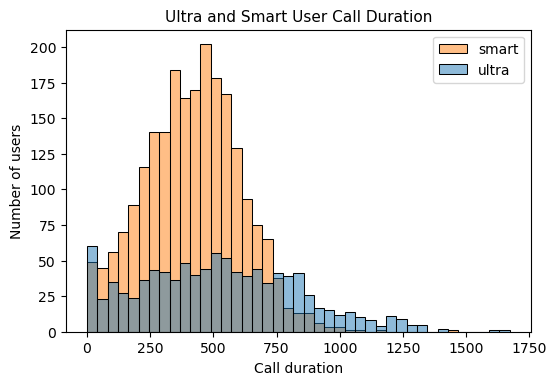

In [56]:
plt.figure(dpi=100)
sns.histplot(
    data= mega,
    x='calls_duration',
    hue='tariff',
)
plt.xlabel('Call duration', fontsize=10)
plt.ylabel('Number of users', fontsize=10)
plt.title('Ultra and Smart User Call Duration', fontsize=11)
plt.legend(['smart', 'ultra']);

In [57]:
ultra_mega['calls_duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_duration, dtype: float64

In [58]:
smart_mega['calls_duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_duration, dtype: float64

Conclusion on spent minutes of conversation for Ultra and Smart Tariffs:
- Ultra tariff users miss calls much more often than Smart tariff users.
- Ultra tariff users talk on the phone less often, but longer than Smart tariff users (752 versus 545).

**Histogram of the number of sent SMS:**

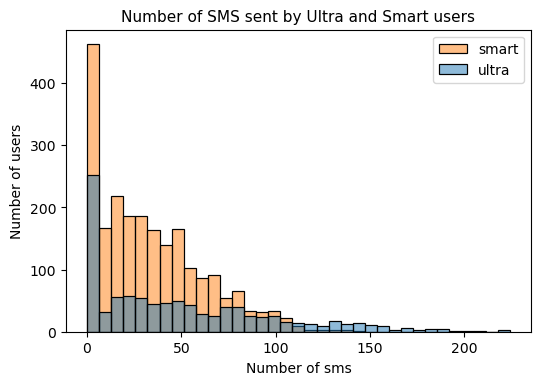

In [59]:
plt.figure(dpi=100)
sns.histplot(
    data= mega,
    x='message_count',
    hue='tariff',
)
plt.xlabel('Number of sms', fontsize=10)
plt.ylabel('Number of users', fontsize=10)
plt.title('Number of SMS sent by Ultra and Smart users', fontsize=11)
plt.legend(['smart', 'ultra']);

In [60]:
ultra_mega['message_count'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_count, dtype: float64

In [61]:
smart_mega['message_count'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_count, dtype: float64

Conclusion on the number of sent SMS for Ultra and Smart Tariffs:
- There are far fewer Ultra tariff users who send SMS messages than Smart tariff users.
- Ultra tariff users send more SMS (from 0 to 224 sms) than Smart tariff users (from 0 to 143s ms)


**Histogram of Internet traffic used:**

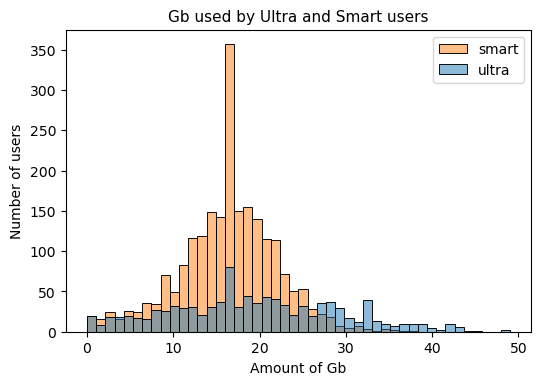

In [62]:
plt.figure(dpi=100)
sns.histplot(
    data= mega,
    x='gb_used',
    hue='tariff',
)
plt.xlabel('Amount of Gb', fontsize=10)
plt.ylabel('Number of users', fontsize=10)
plt.title('Gb used by Ultra and Smart users', fontsize=11)
plt.legend(['smart', 'ultra']);

In [63]:
ultra_mega['gb_used'].describe()

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

In [64]:
smart_mega['gb_used'].describe()

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

Conclusion on spent Gb of Internet traffic for Ultra and Smart Tariffs:
- Users of the Ultra tariff who have spent less than 28Gb of Internet traffic are much less than users of the Smart tariff.
- Ultra tariff users spend more Internet traffic per month than Smart tariff users (50 vs 39)

**Histogram of revenue received for each of the tariffs:**

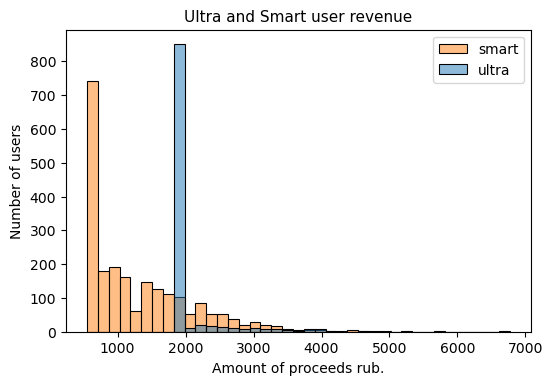

In [65]:
# Let's conduct a study on revenue from users of tariffs by months:
plt.figure(dpi=100)
sns.histplot(
     data=mega,
     x='revenue',
     hue='tariff',
)
plt.xlabel('Amount of proceeds rub.', fontsize=10)
plt.ylabel('Number of users', fontsize=10)
plt.title('Ultra and Smart user revenue', fontsize=11)
plt.legend(['smart', 'ultra']);

In [66]:
ultra_revenue = ultra_mega['revenue']
ultra_revenue.describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

In [67]:
ultra_revenue.sum()

2039100.0

In [68]:
smart_revenue = smart_mega['revenue']
smart_revenue.describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

In [69]:
smart_revenue.sum()

2875351.0

Revenue Conclusion for Ultra and Smart Tariffs:
- Ultra tariff users have a lower maximum check than Smart tariff users (4800 vs. 6770)
- Smart tariff users overpay for the use of services beyond tariff packages much more often and more than Ultra tariff users:
     - The 2nd and 3rd quartiles of Ultra = the subscription fee of the tariff, while the 2nd and 3rd quartiles of Smart exceed the subscription fee by almost 2 and 3 times, respectively.
     - the maximum bill of a Smart tariff user exceeds the monthly fee by more than 12 times! (6770 vs 550)
- Smart tariff users bring more revenue to the company than Ultra tariff users (2,875,351 vs. 2,039,100)

**Overall conclusion from tariff analysis:**

There are more than 2 times more users of the "Smart" tariff than users of the "Ultra" tariff (350 versus 148) - initially we had 500 unique users, but 2 of them are not users of these tariffs.

*Withdrawal for Tariff "Ultra":*

- On average, users of this tariff plan need:
    - 527 minutes of calls
    - 50 sms
    - 20 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 3000 minutes of talk time
    - 1000 sms
    - 30 GB of Internet traffic
 *The tariff contains the excess number of minutes, sms and Gb used by users*

*Withdrawal at Tariff "Smart":*

- On average, users of this tariff plan need:
    - 418 minutes of talk time
    - 34 sms
    - 17 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 500 minutes of talk time
    - 50 sms
    - 15 GB of Internet traffic
*The tariff contains an insufficient amount of Gb in order to cover the needs of users*
    
Conclusion on spent minutes of conversation for Ultra and Smart Tariffs:
- Ultra tariff users miss calls much more often than Smart tariff users.
- Ultra tariff users talk on the phone less often, but longer than Smart tariff users (752 versus 545).

Conclusion on the number of sent SMS for Ultra and Smart Tariffs:
- There are far fewer Ultra tariff users who send SMS messages than Smart tariff users.
- Ultra tariff users send more SMS (from 0 to 224 sms) than Smart tariff users (from 0 to 143s ms)

Conclusion on spent Gb of Internet traffic for Ultra and Smart Tariffs:
- Users of the Ultra tariff who have spent less than 28Gb of Internet traffic are much less than users of the Smart tariff.
- Ultra tariff users spend more Internet traffic per month than Smart tariff users (50 vs 39)

Revenue Conclusion for Ultra and Smart Tariffs:
- Ultra tariff users have a lower maximum check than Smart tariff users (4800 vs. 6770)
- Smart tariff users overpay for the use of services beyond tariff packages much more often and more than Ultra tariff users:
     - The 2nd and 3rd quartiles of Ultra = the subscription fee of the tariff, while the 2nd and 3rd quartiles of Smart exceed the subscription fee by almost 2 and 3 times, respectively.
     - the maximum bill of a Smart tariff user exceeds the monthly fee by more than 12 times! (6770 vs 550)
- Smart tariff users bring more revenue to the company than Ultra tariff users (2,875,351 vs. 2,039,100)

### 5 - Hypothesis testing:
Test hypotheses:
- the average revenue of users of the "Ultra" and "Smart" tariffs differ;
- the average revenue of users from Moscow differs from the revenue of users from other regions. Set the threshold value alpha yourself.

Explain:
How did you formulate the null and alternative hypotheses?
- what criterion was used to test the hypotheses and why.

**Formulation and testing of the 1st hypothesis:**

"The average revenue of users of tariffs "Ultra" and "Smart" differ.
- Null hypothesis - The average revenue from users of "Ultra" and "Smart" tariffs does not differ.
- Alternative hypothesis - The average revenue from users of the "Ultra" and "Smart" tariffs is different.

In [70]:
# As samples, we take the revenue values from the ultra_mega and smart_mega data sets

ultra_sample = ultra_mega['revenue']
smart_sample = smart_mega['revenue']

alpha = .05

results = st.ttest_ind(ultra_sample, smart_sample)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
     print("We reject the null hypothesis, the average revenue from users of the Ultra and Smart tariffs is different ")
else:
     print("It was not possible to reject the null hypothesis, the average revenue from users of the Ultra and Smart tariffs does not differ. ")

p-value:  1.4229814360764067e-160
We reject the null hypothesis, the average revenue from users of the Ultra and Smart tariffs is different 


In [71]:
mean_ultra_revenue = np.ceil(ultra_sample.mean())
mean_ultra_revenue

2071.0

In [72]:
mean_smart_revenue = np.ceil(smart_sample.mean())
mean_smart_revenue

1290.0

Hypothesis Test Conclusion #1:
- the sample mean is significantly less than the expected value of 0.05. , therefore, the average revenue from users of the Ultra and Smart tariffs differs significantly
- empirically obtained the values of revenue from each group of users 2090 and 1346 - the values really differ.

**Formulation and testing of the 2nd hypothesis:**

"The average revenue of users from Moscow differs from the revenue of users from other regions."
- Null hypothesis - The average revenue of users from Moscow does not differ from the revenue of users from other regions.
- Alternative hypothesis - The average revenue of users from Moscow differs from the revenue of users from other regions.

In [73]:
# As samples, we take the values of revenue from the mega data sets by setting the parameter Moscow and not Moscow

moscow_sample = mega[mega['city'] == "Moscow"]['revenue']
city_sample = mega[mega['city'] != "Moscow"]['revenue']

alpha = .05

results = st.ttest_ind(ultra_sample, smart_sample)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
     print("We reject the null hypothesis, the average revenue of users from Moscow differs from the revenue of users from other regions. ")
else:
     print("We failed to reject the null hypothesis, the average revenue of users from Moscow does not differ from the revenue of users from other regions. ")

p-value:  1.4229814360764067e-160
We reject the null hypothesis, the average revenue of users from Moscow differs from the revenue of users from other regions. 


In [74]:
moscow_sample_revenue = np.ceil(moscow_sample.mean())
moscow_sample_revenue

nan

In [75]:
city_sample_revenue = np.ceil(city_sample.mean())
city_sample_revenue

1530.0

Conclusion on testing hypothesis No. 2:
- the sample mean is significantly less than the expected value of 0.05. , therefore, the average revenue of users from Moscow differs from the revenue of users from other regions.
- empirically obtained the value of revenue from users from Moscow and other cities of 1590 and 1571 - the values really differ, although not significantly

Explanation:

how did you formulate the null and alternative hypotheses:
- *the statement that needs to be confirmed or disproved is an alternative hypothesis, which means that the null hypothesis will sound opposite to the alternative*

what criterion was used to test the hypotheses and why:
- *the criterion for testing the hypothesis was set to 5%, since this value is the generally accepted level of statistical significance*

### 6 - General conclusion

**Conclusion based on primary visual evaluation of the data**

 - all values ​​in the data users['age'], calls['duration'], internet['mb_used'] values ​​are within normal limits, there is no need to speak about the presence of outliers.
 - there are no missing values in the data, except for the data users['churn_date'] - there are 462 gaps - the tariff is still valid at the time of unloading.
 - all data, with the exception of columns containing information about the date, are correct. Data type substitution is required only for data with a date
 - data on the climates are indicated in mb. You need to convert them to gb
 - internet dataset contains extra column Unnamed: 0, needs to be deleted
 - datasets internet, messages, calls contain columns with the same 'id' name - this can create confusion if multiple tables need to be merged. It is necessary to replace these names with those that will reflect belonging to certain data.
 
 
**Data pre-processing:**

- An extra column was removed: delete the Unnamed column from the internet dataset: 0
- Renamed columns in datasets: messages, internet, calls (this will help to correctly recognize data after merging tables)
- Converted data to correct types: (change data from object to datetime)
- Changed limit values ​​from mb to gb in the tariffs data set
- In the data set, calls are rounded up to integer values ​​in accordance with the terms of the tariff.

**Working with data. For each user it was calculated:**

- the number of calls made and spent minutes of conversation by month;
- the number of sent messages by month;
- the amount of Internet traffic used by months;
- monthly revenue from each user (subtract the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan).

**Overall conclusion from tariff analysis:**

There are more than 2 times more users of the "Smart" tariff than users of the "Ultra" tariff (350 versus 148) - initially we had 500 unique users, but 2 of them are not users of these tariffs.

*Withdrawal for Tariff "Ultra":*

- On average, users of this tariff plan need:
    - 527 minutes of calls
    - 50 sms
    - 20 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 3000 minutes of talk time
    - 1000 sms
    - 30 GB of Internet traffic
 *The tariff contains the excess number of minutes, sms and Gb used by users*

*Withdrawal at Tariff "Smart":*

- On average, users of this tariff plan need:
    - 418 minutes of talk time
    - 34 sms
    - 17 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 500 minutes of talk time
    - 50 sms
    - 15 GB of Internet traffic
*The tariff contains an insufficient amount of Gb in order to cover the needs of users*
    
Conclusion on spent minutes of conversation for Ultra and Smart Tariffs:
- Ultra tariff users miss calls much more often than Smart tariff users.
- Ultra tariff users talk on the phone less often, but longer than Smart tariff users (752 versus 545).

Conclusion on the number of sent SMS for Ultra and Smart Tariffs:
- There are far fewer Ultra tariff users who send SMS messages than Smart tariff users.
- Ultra tariff users send SMS to more

In [76]:
month_trands = mega[['month','revenue','tariff']].sort_values('month')
month_trands

,month,revenue,tariff
1798,1,550.0,smart
1240,1,1103.0,smart
2849,1,550.0,smart
2363,1,550.0,smart
3066,1,550.0,smart
...,...,...,...
2773,12,950.0,smart
877,12,3300.0,ultra
884,12,1950.0,ultra
2807,12,1950.0,smart


In [77]:
month_trands_sum = month_trands.groupby(['month','tariff'])['revenue'].sum()
month_trands_sum = month_trands_sum.reset_index()
month_trands_sum

,month,tariff,revenue
0,1,smart,24525.0
1,1,ultra,17550.0
2,2,smart,48001.0
3,2,ultra,47400.0
4,3,smart,89676.0
5,3,ultra,74550.0
6,4,smart,107866.0
7,4,ultra,110100.0
8,5,smart,168849.0
9,5,ultra,138000.0


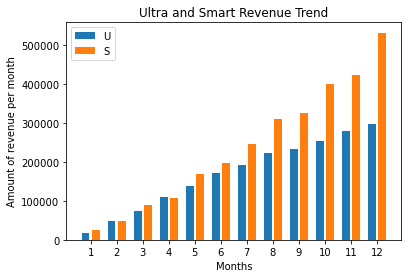

In [78]:
x = month_trands_sum['month'].unique()
y_ultra = month_trands_sum[month_trands_sum['tariff'] == 'ultra']['revenue']
z_smart = month_trands_sum[month_trands_sum['tariff'] == 'smart']['revenue']
  
x_axis = np.arange(len(x))
  
plt.bar(x_axis - 0.2, y_ultra, 0.3, label = 'U')
plt.bar(x_axis + 0.2, z_smart, 0.3, label = 'S')
  

plt.xticks(x_axis, x)
plt.xlabel("Months")
plt.ylabel("Amount of revenue per month")
plt.title("Ultra and Smart Revenue Trend")

plt.legend()
plt.show()

Conclusion on the analysis of revenue by months for each tariff:
- There is an upward trend in revenue from January to December 2018. at Ultra and Smart tariff
- For the first 4 months, tariff revenues were about the same. Starting from the 5th month, revenue from the Smart tariff began to increase in relation to the Ultra tariff
- At the end of the year, for December, the revenue of the Ultra tariff = 297300.0, and the Smart tariff = 531965.0 - almost 1.5 times more

## Final conclusion by tariff plans

**Conclusion on the analysis of revenue by months for each tariff:**

- There is an upward trend in revenue from January to December 2018. at Ultra and Smart tariff
- For the first 4 months, tariff revenues were about the same. Starting from the 5th month, revenue from the Smart tariff began to increase in attitude to the Ultra tariff
- At the end of the year, for December, the revenue of the Ultra tariff = 297300.0, and the Smart tariff = 531965.0 - almost 1.5 times more

**Overall conclusion from tariff analysis:**

There are more than 2 times more "Smart" tariff users than "Ultra" tariff users (350 versus 148)

*Withdrawal for Tariff "Ultra":*

- On average, users of this tariff plan need:
    - 527 minutes of calls
    - 50 sms
    - 20 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 3000 minutes of talk time
    - 1000 sms
    - 30 GB of Internet traffic
 *The tariff contains the excess number of minutes, sms and Gb used by users*

*Withdrawal at Tariff "Smart":*

- On average, users of this tariff plan need:
    - 418 minutes of talk time
    - 34 sms
    - 17 Gb of Internet traffic
- Instead, Megaline provides users with:
    - 500 minutes of talk time
    - 50 sms
    - 15 GB of Internet traffic
*The tariff contains an insufficient amount of Gb in order to cover the needs of users*

**Revenue output for Ultra and Smart Tariffs:**
- Ultra tariff users have a lower maximum check than Smart tariff users (4800 vs. 6770)
- Smart tariff users overpay for the use of services beyond tariff packages much more often and more than Ultra tariff users:
     - The 2nd and 3rd quartiles of Ultra = the subscription fee of the tariff, while the 2nd and 3rd quartiles of Smart exceed the subscription fee by almost 2 and 3 times, respectively.
     - the maximum bill of a Smart tariff user exceeds the monthly fee by more than 12 times! (6770 vs 550)
- Smart tariff users bring more revenue to the company than Ultra tariff users (2,875,351 vs. 2,039,100)